# Power Transforms

Data transforms are intended to rmove noise and improve signal in time seires forecasting

In [22]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
1951-01-01    145
1951-02-01    150
1951-03-01    178
1951-04-01    163
1951-05-01    172
1951-06-01    178
1951-07-01    199
1951-08-01    199
Name: Passengers, dtype: int64


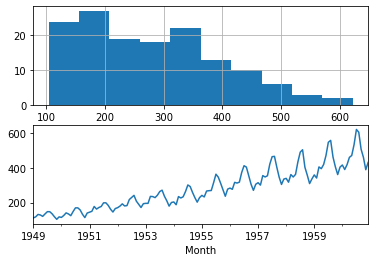

In [18]:
series = pd.read_csv('datasets/airline-passengers.csv', index_col=0, parse_dates=True, squeeze=True)

print(series.head(32))

fig, ax = plt.subplots()

plt.subplot(211)
series.hist()

plt.subplot(212)
series.plot()

plt.show()

## Square Root Transform

For time series that has a quadratic growth.
For example, a dataset of a series of number 1 to 99 squared:

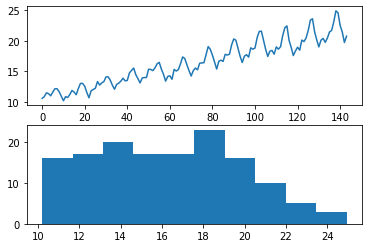

In [23]:
dataframe = pd.DataFrame(series.values)
dataframe.columns = ['passengers']

# Square root the passengers dataset
dataframe['passengers'] = np.sqrt(dataframe['passengers'])

plt.subplot(211)
plt.plot(dataframe)
plt.subplot(212)
plt.hist(dataframe)
plt.show()

We can see that the trend was reduced, but not removed.
The line plot still shows an increasing variance from cycle to cycle. The histogram still shows a long tail to the right of the distribution, suggesting an exponential or long-tail distribution.

## Log Transform 

For trends that are exponential, often graphed as a hockey stick

(array([ 8., 14., 11., 20., 16., 15., 27., 17., 11.,  5.]),
 array([4.6443909 , 4.82324582, 5.00210074, 5.18095566, 5.35981058,
        5.5386655 , 5.71752042, 5.89637533, 6.07523025, 6.25408517,
        6.43294009]),
 <BarContainer object of 10 artists>)

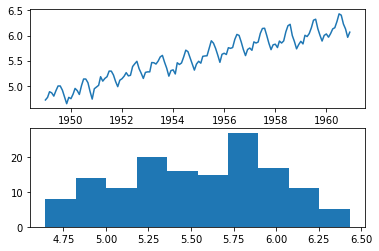

In [25]:
log_transformed = np.log(series)

plt.subplot(211)
plt.plot(log_transformed)
plt.subplot(212)
plt.hist(log_transformed)

The histogram also shows a more uniform or squashed Gaussian-like distribution of observations.

## Box-Cox Transform

scipy.stats.boxcox():

    - lambda = -1. is a reciprocal transform.
    - lambda = -0.5 is a reciprocal square root transform.
    - lambda = 0.0 is a log transform.
    - lambda = 0.5 is a square root transform.
    - lambda = 1.0 is no transform.




Lambda is 0.14802265137037945


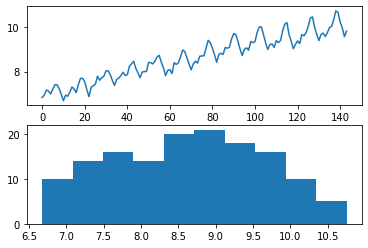

In [44]:
from scipy.stats import boxcox
dataframe = pd.DataFrame(series.values)
dataframe.columns = ['passengers']

# set the lambda parameter to None (the default) and let the function find a statistically tuned value
# (which is the lambda that maximizes the log-likelihood function)
dataframe['passengers'], lam = boxcox(dataframe['passengers'], lmbda=None)

print('Lambda is', lam)

plt.subplot(211)
plt.plot(dataframe['passengers'])
plt.subplot(212)
plt.hist(dataframe['passengers'])
plt.show()
